In [15]:
from pycaret.regression import *
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(555)

EXCLUDE = ["par", "llar"]
def read_and_clean_data(filename):
    df = pd.read_csv(filename, parse_dates = ['time'])
    
    df["pospercent"] = df.pos / df.total
    
    df.pos = df.pos.astype(int)
    df.neg = df.neg.astype(int)
    df.total = df.total.astype(int)
    
    df["BTC_change"] = (df.BTC_price - df.BTC_price.shift(1))
    df["SPY_change"] = (df.SPY_price - df.SPY_price.shift(1))
    df["VXX_change"] = (df.VXX_price - df.VXX_price.shift(1))
    df["XAU_change"] = (df.XAU_price - df.XAU_price.shift(1))
    
    df["change"] = 100*(df.XRP_price.shift(-1) - df.XRP_price) / df.XRP_price

    df = df.drop(['XRP_price','BTC_price','SPY_price','VXX_price','XAU_price','SPY_change','labels','pos','neg','time','dom'], axis = 1)
    df = df.dropna()
    df = df.reset_index(drop = True)
    return df

## Day

In [2]:
day = read_and_clean_data("data/full_day.csv")
day_train, day_test = train_test_split(day, test_size = 0.20, random_state = 1 )
day_train, day_test = day_train.reset_index(drop = True), day_test.reset_index(drop = True)
day.head(5)

,total,pospercent,BTC_change,VXX_change,XAU_change,change
0,283,0.798587,-703.00,-0.2600,2.46825,0.026267
1,264,0.696970,156.75,0.0000,-1.27750,-0.019695
2,262,0.801527,67.75,0.2000,3.14575,-0.019699
3,288,0.750000,437.50,-0.7550,12.81750,-0.006568
4,290,0.724138,1042.75,-0.6375,12.03250,-0.059113


In [3]:
sday = setup(data = day_train,
             target = 'change',
             silent = True, 
             numeric_features = ["total"],
            session_id = 1)
set_config('seed', 555) 

,Description,Value
0,session_id,1
1,Target,change
2,Original Data,"(42, 6)"
3,Missing Values,0
4,Numeric Features,5
5,Categorical Features,0
6,Ordinal Features,0
7,High Cardinality Features,0
8,High Cardinality Method,None
9,Transformed Train Set,"(29, 5)"


In [4]:
mday = compare_models(exclude = EXCLUDE)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.0324,0.0018,0.0358,-1.0538,0.0304,1.1341,0.2190
dummy,Dummy Regressor,0.0324,0.0018,0.0358,-1.0538,0.0304,1.1341,0.0020
lasso,Lasso Regression,0.0339,0.0019,0.0387,-3.7660,0.0313,1.3992,0.0020
en,Elastic Net,0.0344,0.0019,0.0392,-3.9781,0.0313,1.4331,0.0020
knn,K Neighbors Regressor,0.0362,0.0022,0.0414,-4.0095,0.0278,1.4962,0.0030
rf,Random Forest Regressor,0.0405,0.0025,0.0446,-4.0954,0.0305,1.8019,0.0220
omp,Orthogonal Matching Pursuit,0.0354,0.0020,0.0404,-4.2125,0.0313,1.4489,0.0020
br,Bayesian Ridge,0.0373,0.0022,0.0419,-5.4449,0.0317,1.6173,0.0020
ada,AdaBoost Regressor,0.0422,0.0027,0.0479,-6.5917,0.0289,2.0857,0.0080
ridge,Ridge Regression,0.0397,0.0024,0.0443,-7.2669,0.0319,1.7382,0.0020


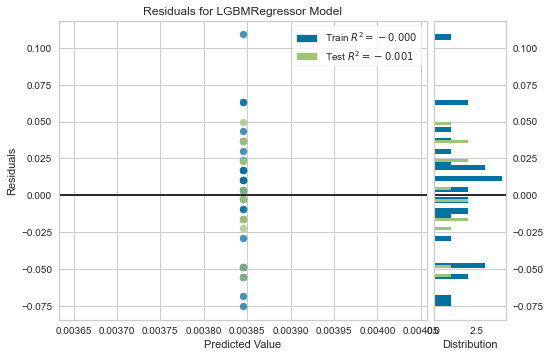

In [5]:
plot_model(mday)

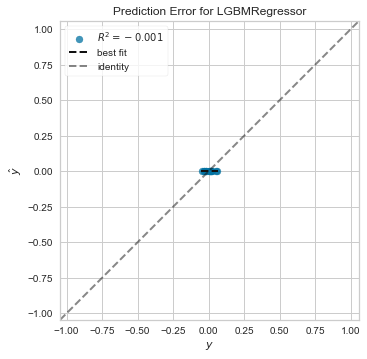

In [6]:
plot_model(mday, plot = 'error')

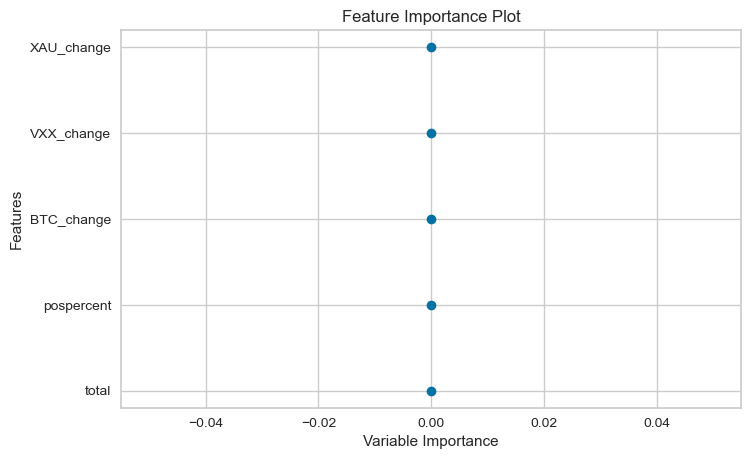

In [7]:
plot_model(mday, plot='feature')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.0200,0.0006,0.0246,-0.0352,0.0221,0.9138


<Figure size 1080x504 with 0 Axes>

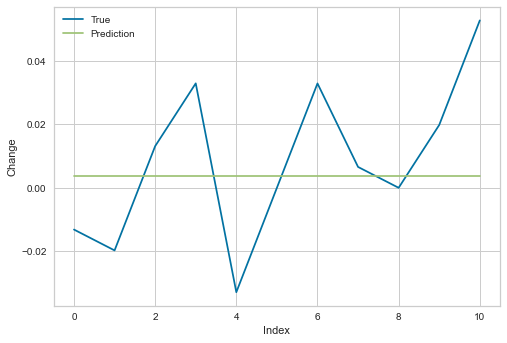

In [29]:
pred = predict_model(mday, data = day_test)[['change', 'Label']]
pred = pred.rename({'change':'True', 'Label':'Prediction'}, axis = 1)
plt.figure(figsize=(15, 7))
ax = pred.plot()
ax.set(xlabel='Index', ylabel='Change')
plt.savefig('images/day_pycaret_plot.pdf', format = "pdf", dpi = 300,bbox_inches='tight')
plt.savefig('images/day_pycaret_plot.jpg', format = "jpg", dpi = 300,bbox_inches='tight')
plt.show()

In [21]:
plot_model(mday, save = True)
plot_model(mday, plot = 'error', save = True)
plot_model(mday, plot='feature', save = True)
#save_model(mday, "pc_day")

'Feature Importance.png'

## Hour

In [22]:
hour = read_and_clean_data("data/full_hour.csv")
hour_train, hour_test = train_test_split(hour, test_size = 0.25, random_state = 555)
hour_train, hour_test = hour_train.reset_index(drop = True), hour_test.reset_index(drop = True)
hour.head(5)

,total,pospercent,BTC_change,VXX_change,XAU_change,change
0,6,0.666667,7.00,0.0,-0.17575,-0.484932
1,5,0.800000,-601.00,0.0,1.05325,-0.612600
2,21,0.904762,-548.75,0.0,0.48325,0.693423
3,22,0.909091,19.50,0.0,-1.01825,1.732053
4,8,0.750000,-91.50,0.0,-1.34650,0.923077


In [23]:
shour = setup(data = hour_train,
             target = 'change',
             silent = True, 
             numeric_features = ["total"],
            session_id = 2)
set_config('seed', 555) 

,Description,Value
0,session_id,2
1,Target,change
2,Original Data,"(926, 6)"
3,Missing Values,0
4,Numeric Features,5
5,Categorical Features,0
6,Ordinal Features,0
7,High Cardinality Features,0
8,High Cardinality Method,None
9,Transformed Train Set,"(648, 5)"


/Users/mgaulia/miniforge3/envs/pc/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: The outputs_2d_ attribute is deprecated in version 0.22 and will be removed in version 0.24. It is equivalent to n_outputs_ > 1.
  warnings.warn(msg, category=FutureWarning)
/Users/mgaulia/miniforge3/envs/pc/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: The outputs_2d_ attribute is deprecated in version 0.22 and will be removed in version 0.24. It is equivalent to n_outputs_ > 1.
  warnings.warn(msg, category=FutureWarning)
/Users/mgaulia/miniforge3/envs/pc/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: The outputs_2d_ attribute is deprecated in version 0.22 and will be removed in version 0.24. It is equivalent to n_outputs_ > 1.
  warnings.warn(msg, category=FutureWarning)
/Users/mgaulia/miniforge3/envs/pc/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: The outputs_2d_ attribute is depre

In [24]:
mhour = compare_models(exclude = EXCLUDE)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lasso,Lasso Regression,0.5075,0.5158,0.7143,-0.0169,0.4385,1.0769,0.0020
en,Elastic Net,0.5075,0.5158,0.7143,-0.0169,0.4377,1.0819,0.0020
br,Bayesian Ridge,0.5076,0.5161,0.7145,-0.0173,0.4369,1.0882,0.0030
dummy,Dummy Regressor,0.5066,0.5163,0.7148,-0.0191,0.4455,1.0230,0.0040
omp,Orthogonal Matching Pursuit,0.5090,0.5184,0.7162,-0.0229,0.4386,1.0963,0.0020
huber,Huber Regressor,0.5072,0.5184,0.7164,-0.0236,0.4422,1.0797,0.0050
ridge,Ridge Regression,0.5095,0.5190,0.7166,-0.0241,0.4331,1.1211,0.0020
lr,Linear Regression,0.5096,0.5191,0.7167,-0.0244,0.4329,1.1222,0.2670
lar,Least Angle Regression,0.5096,0.5191,0.7167,-0.0244,0.4329,1.1222,0.0030
rf,Random Forest Regressor,0.5545,0.5728,0.7548,-0.1518,0.3599,1.9075,0.0400


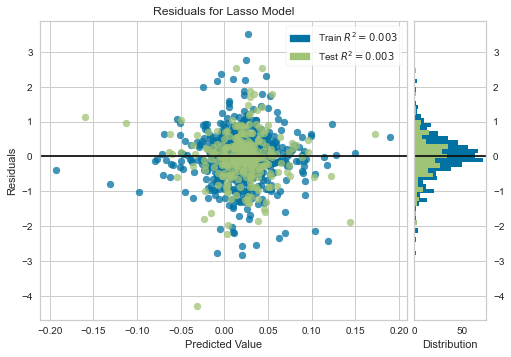

In [25]:
plot_model(mhour)

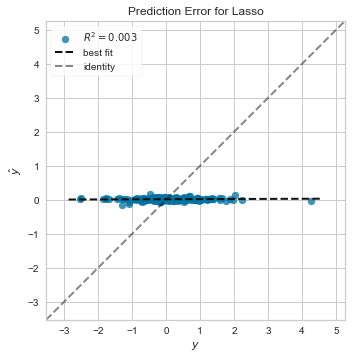

In [26]:
plot_model(mhour, plot = "error")

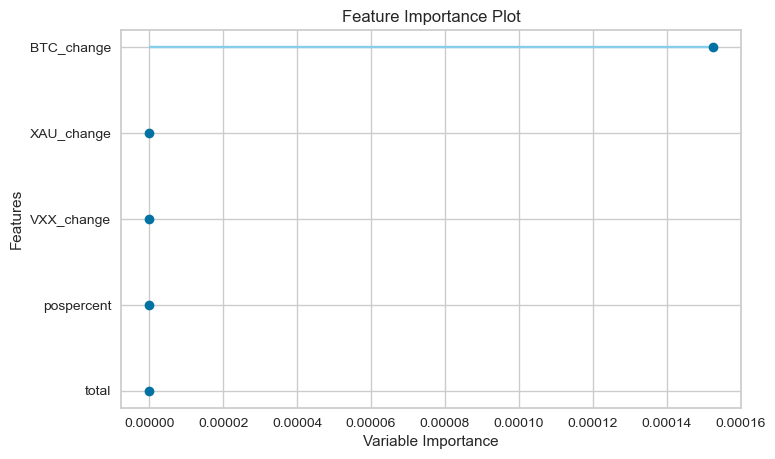

In [27]:
plot_model(mhour, plot = "feature")

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Lasso Regression,0.5068,0.5323,0.7296,-0.0068,0.4418,1.0691


<Figure size 1080x504 with 0 Axes>

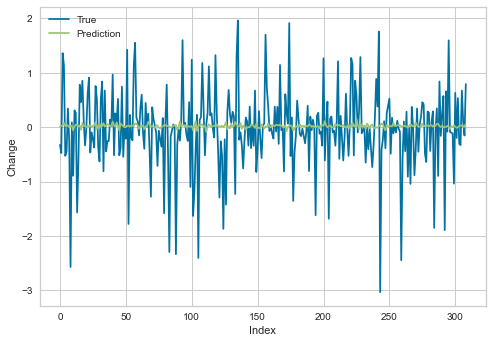

In [30]:
pred = predict_model(mhour, data = hour_test)[['change', 'Label']]
pred = pred.rename({'change':'True', 'Label':'Prediction'}, axis = 1)
plt.figure(figsize=(15, 7))
ax = pred.plot()
ax.set(xlabel='Index', ylabel='Change')
plt.savefig('images/hour_pycaret_plot.pdf', format = "pdf", dpi = 300,bbox_inches='tight')
plt.savefig('images/hour_pycaret_plot.jpg', format = "jpg", dpi = 300,bbox_inches='tight')
plt.show()

In [31]:
plot_model(mhour, save = True)
plot_model(mhour, plot = "error", save = True)
plot_model(mhour, plot = "feature", save = True)

'Feature Importance.png'

## Minute

In [34]:
minute = read_and_clean_data("data/full_minute.csv")
minute_train, minute_test = train_test_split(minute, test_size = 0.15, random_state = 555)
minute_train, minute_test = minute_train.reset_index(drop = True), minute_test.reset_index(drop = True)
minute.head(5)

,total,pospercent,BTC_change,VXX_change,XAU_change,change
0,2,1.0,-16.00,0.0,0.03750,-0.041300
1,1,1.0,-38.25,0.0,-0.09250,-0.055024
2,2,1.0,-17.00,0.0,0.13200,0.013790
3,2,1.0,11.25,0.0,-0.00725,0.068913
4,1,1.0,-3.50,0.0,0.14675,0.137410


In [35]:
shour = setup(data = minute_train,
             target = 'change',
             silent = True, 
             numeric_features = ["total"],
            session_id = 3)
set_config('seed', 555) 

,Description,Value
0,session_id,3
1,Target,change
2,Original Data,"(7798, 6)"
3,Missing Values,0
4,Numeric Features,5
5,Categorical Features,0
6,Ordinal Features,0
7,High Cardinality Features,0
8,High Cardinality Method,None
9,Transformed Train Set,"(5458, 5)"


In [36]:
mminute = compare_models(exclude = EXCLUDE)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
omp,Orthogonal Matching Pursuit,0.0613,0.0089,0.0941,-0.0003,0.0820,305240377.8918,0.0030
br,Bayesian Ridge,0.0613,0.0089,0.0941,-0.0008,0.0822,316361171.5907,0.0030
huber,Huber Regressor,0.0613,0.0089,0.0941,-0.0010,0.0824,254201077.2437,0.0070
lr,Linear Regression,0.0614,0.0089,0.0941,-0.0013,0.0818,342335059.4031,0.0030
ridge,Ridge Regression,0.0614,0.0089,0.0941,-0.0013,0.0818,341539001.5030,0.0020
lar,Least Angle Regression,0.0614,0.0089,0.0941,-0.0013,0.0818,342332221.5092,0.0030
lasso,Lasso Regression,0.0612,0.0089,0.0942,-0.0017,0.0831,115472822.8000,0.0030
en,Elastic Net,0.0612,0.0089,0.0942,-0.0017,0.0831,115472822.8000,0.0030
dummy,Dummy Regressor,0.0612,0.0089,0.0942,-0.0017,0.0831,115472822.8000,0.0030
gbr,Gradient Boosting Regressor,0.0624,0.0091,0.0950,-0.0204,0.0798,3237250160.5608,0.0570


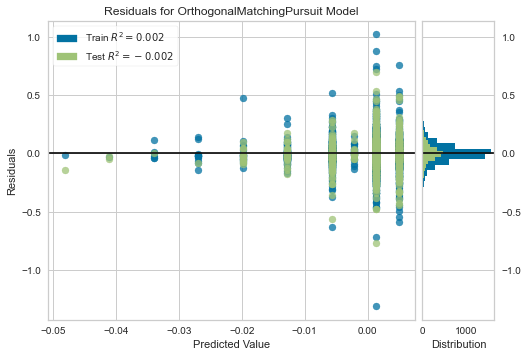

In [37]:
plot_model(mminute)

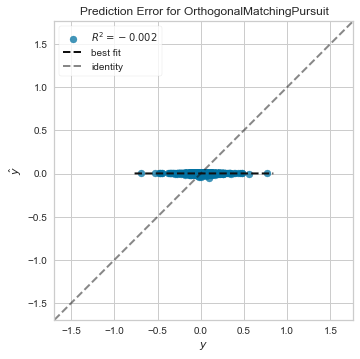

In [38]:
plot_model(mminute, plot = "error")

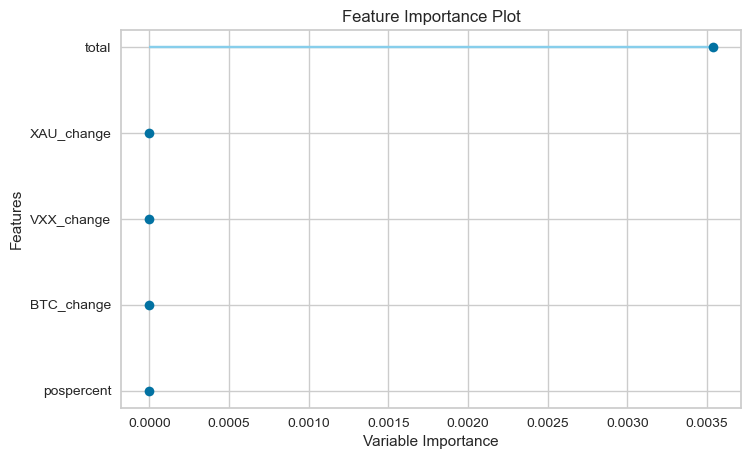

In [39]:
plot_model(mminute, plot = "feature")

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Orthogonal Matching Pursuit,0.0603,0.0090,0.0947,0.0027,0.0822,632608281.8906


<Figure size 1080x504 with 0 Axes>

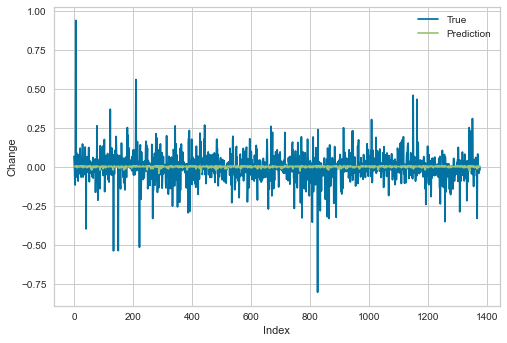

In [40]:
pred = predict_model(mminute, data = minute_test)[['change', 'Label']]
pred = pred.rename({'change':'True', 'Label':'Prediction'}, axis = 1)
plt.figure(figsize=(15, 7))
ax = pred.plot()
ax.set(xlabel='Index', ylabel='Change')
plt.savefig('images/minute_pycaret_plot.pdf', format = "pdf", dpi = 300,bbox_inches='tight')
plt.savefig('images/minute_pycaret_plot.jpg', format = "jpg", dpi = 300,bbox_inches='tight')
plt.show()

In [41]:
plot_model(mminute, save = True)
plot_model(mminute, plot = "error", save = True)
plot_model(mminute, plot = "feature", save = True)
#save_model(mminute, "pc_minute")

'Feature Importance.png'